In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [127]:
def load_employee_data():
    global full_employee_data

    general_data = pd.read_csv('datasets/general_data.csv')
    employee_survey_data = pd.read_csv('datasets/employee_survey_data.csv')
    manager_survey_data = pd.read_csv('datasets/manager_survey_data.csv')

    full_employee_data = general_data.merge(employee_survey_data, on='EmployeeID')
    full_employee_data = full_employee_data.merge(manager_survey_data, on='EmployeeID')


load_employee_data()

In [128]:
def create_working_time_columns():
    """
        Process in_time.csv and out_time.csv data to create working time columns in the general_data dataframe
    """
    global full_employee_data
    in_time = pd.read_csv('datasets/in_time.csv').astype('datetime64[ns]')
    out_time = pd.read_csv('datasets/out_time.csv').astype('datetime64[ns]')

    average = (out_time - in_time)

    # Convert to hours
    average = average.loc[:, :] / np.timedelta64(1, 'h')

    working_time_df = pd.DataFrame()

    # Create a column EmployeeID
    working_time_df['EmployeeID'] = in_time.iloc[:, 0]
    working_time_df['EmployeeID'] = working_time_df['EmployeeID'].astype('int64')

    # Create a column min and max
    working_time_df['MinimumWorkingTime'] = average.mask(average <= 0).min(axis=1).round(2)
    working_time_df['MaximumWorkingTime'] = average.max(axis=1).round(2)

    # Create a column average
    working_time_df['AverageWorkingTime'] = average.mean(axis=1).round(2)

    # Merge the working time data with the general data
    full_employee_data = full_employee_data.merge(working_time_df, on='EmployeeID')


create_working_time_columns()

In [129]:
full_employee_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,MinimumWorkingTime,MaximumWorkingTime,AverageWorkingTime
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,0,0,3.0,4.0,2.0,3,3,6.50,7.95,7.34
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,1,4,3.0,2.0,4.0,2,4,6.73,8.56,7.69
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,0,3,2.0,2.0,1.0,3,3,6.20,7.99,6.98
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,7,5,4.0,4.0,3.0,2,3,6.28,7.89,7.16
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,0,4,4.0,1.0,3.0,3,3,7.31,8.83,7.97


In [130]:
full_employee_data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,MinimumWorkingTime,MaximumWorkingTime,AverageWorkingTime
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,...,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741,6.861063,8.540254,7.668308
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,...,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742,1.347796,1.342718,1.334767
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.730000,6.580000,5.920000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,5.810000,7.510000,6.642500
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.580000,8.250000,7.380000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000,7.480000,9.190000,8.330000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,10.280000,12.090000,10.980000


In [131]:
# EmployeeCount : All values are 1
# Over18 : All values are 'Y'
# StandardHours : All values are 8
full_employee_data = full_employee_data.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)

In [132]:
#Encoding
cat_data = ['Gender', 'Department', 'BusinessTravel', 'EducationField', 'JobRole', 'MaritalStatus']
for i in cat_data:
    vals = pd.get_dummies(full_employee_data[i], sparse=True)
    full_employee_data = pd.concat([full_employee_data, vals], axis=1)
    
for i in range(len(full_employee_data['Attrition'])):
    if full_employee_data['Attrition'][i] == 'Yes':
        full_employee_data['Attrition'][i] = 1
    else:
        full_employee_data['Attrition'][i] = 0

C:\Users\coola\AppData\Local\Temp\ipykernel_25756\490294009.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  full_employee_data['Attrition'][i] = 0
C:\Users\coola\AppData\Local\Temp\ipykernel_25756\490294009.py:11: SettingWithCopyWarning

In [133]:
full_employee_data = full_employee_data.drop(['Gender', 'Department', 'BusinessTravel', 'EducationField', 'JobRole', 'MaritalStatus'], axis=1)

In [134]:
full_employee_data

,Age,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,51,0,6,2,1,1,131160,1.0,11,0,...,False,False,False,False,False,False,False,False,True,False
1,31,1,10,1,2,1,41890,0.0,23,1,...,False,False,False,False,True,False,False,False,False,True
2,32,0,17,4,3,4,193280,1.0,15,3,...,False,False,False,False,False,True,False,False,True,False
3,38,0,2,5,4,3,83210,3.0,11,3,...,False,False,False,False,False,False,False,False,True,False
4,32,0,10,1,5,1,23420,4.0,12,2,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,5,4,4406,1,60290,3.0,17,1,...,False,False,False,False,True,False,False,False,False,True
4406,29,0,2,4,4407,1,26790,2.0,15,0,...,True,False,False,False,False,False,False,True,False,False
4407,25,0,25,2,4408,2,37020,0.0,20,0,...,False,False,False,False,False,True,False,False,True,False
4408,42,0,18,2,4409,1,23980,0.0,14,1,...,True,False,False,False,False,False,False,True,False,False


In [135]:
#Imputation
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

def imputedata(data):
    for i in data.columns:
        data[i] = imputer.fit_transform(data[[i]])
        
imputedata(full_employee_data)
        
print(full_employee_data.isnull().sum())

Age                          0
Attrition                    0
DistanceFromHome             0
Education                    0
EmployeeID                   0
JobLevel                     0
MonthlyIncome                0
NumCompaniesWorked           0
PercentSalaryHike            0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
YearsAtCompany               0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
EnvironmentSatisfaction      0
JobSatisfaction              0
WorkLifeBalance              0
JobInvolvement               0
PerformanceRating            0
MinimumWorkingTime           0
MaximumWorkingTime           0
AverageWorkingTime           0
Female                       0
Male                         0
Human Resources              0
Research & Development       0
Sales                        0
Non-Travel                   0
Travel_Frequently            0
Travel_Rarely                0
Human Resources              0
Life Sci

In [136]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

def scaledata(data):
    for i in data.columns:
        data[i] = scaler.fit_transform(data[[i]])

scaledata(full_employee_data)

full_employee_data

,Age,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,0.785714,0.0,0.178571,0.25,0.000000,0.00,0.637546,0.111111,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.309524,1.0,0.321429,0.00,0.000227,0.00,0.167457,0.000000,0.857143,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.333333,0.0,0.571429,0.75,0.000454,0.75,0.964666,0.111111,0.285714,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.476190,0.0,0.035714,1.00,0.000680,0.50,0.385045,0.333333,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.333333,0.0,0.321429,0.00,0.000907,0.00,0.070195,0.444444,0.071429,0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0.571429,0.0,0.142857,0.75,0.999093,0.00,0.264350,0.333333,0.428571,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4406,0.261905,0.0,0.035714,0.75,0.999320,0.00,0.087941,0.222222,0.285714,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4407,0.166667,0.0,0.857143,0.25,0.999546,0.25,0.141811,0.000000,0.642857,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4408,0.571429,0.0,0.607143,0.25,0.999773,0.00,0.073144,0.000000,0.214286,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


        Age  DistanceFromHome  Education  EmployeeID  JobLevel  MonthlyIncome  \
0  0.785714          0.178571       0.25    0.000000      0.00       0.637546   
1  0.309524          0.321429       0.00    0.000227      0.00       0.167457   
2  0.333333          0.571429       0.75    0.000454      0.75       0.964666   
3  0.476190          0.035714       1.00    0.000680      0.50       0.385045   
4  0.333333          0.321429       0.00    0.000907      0.00       0.070195   

   NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0            0.111111           0.000000          0.000000              0.025   
1            0.000000           0.857143          0.333333              0.150   
2            0.111111           0.285714          1.000000              0.125   
3            0.333333           0.000000          1.000000              0.325   
4            0.444444           0.071429          0.666667              0.225   

   ...  Laboratory Technic

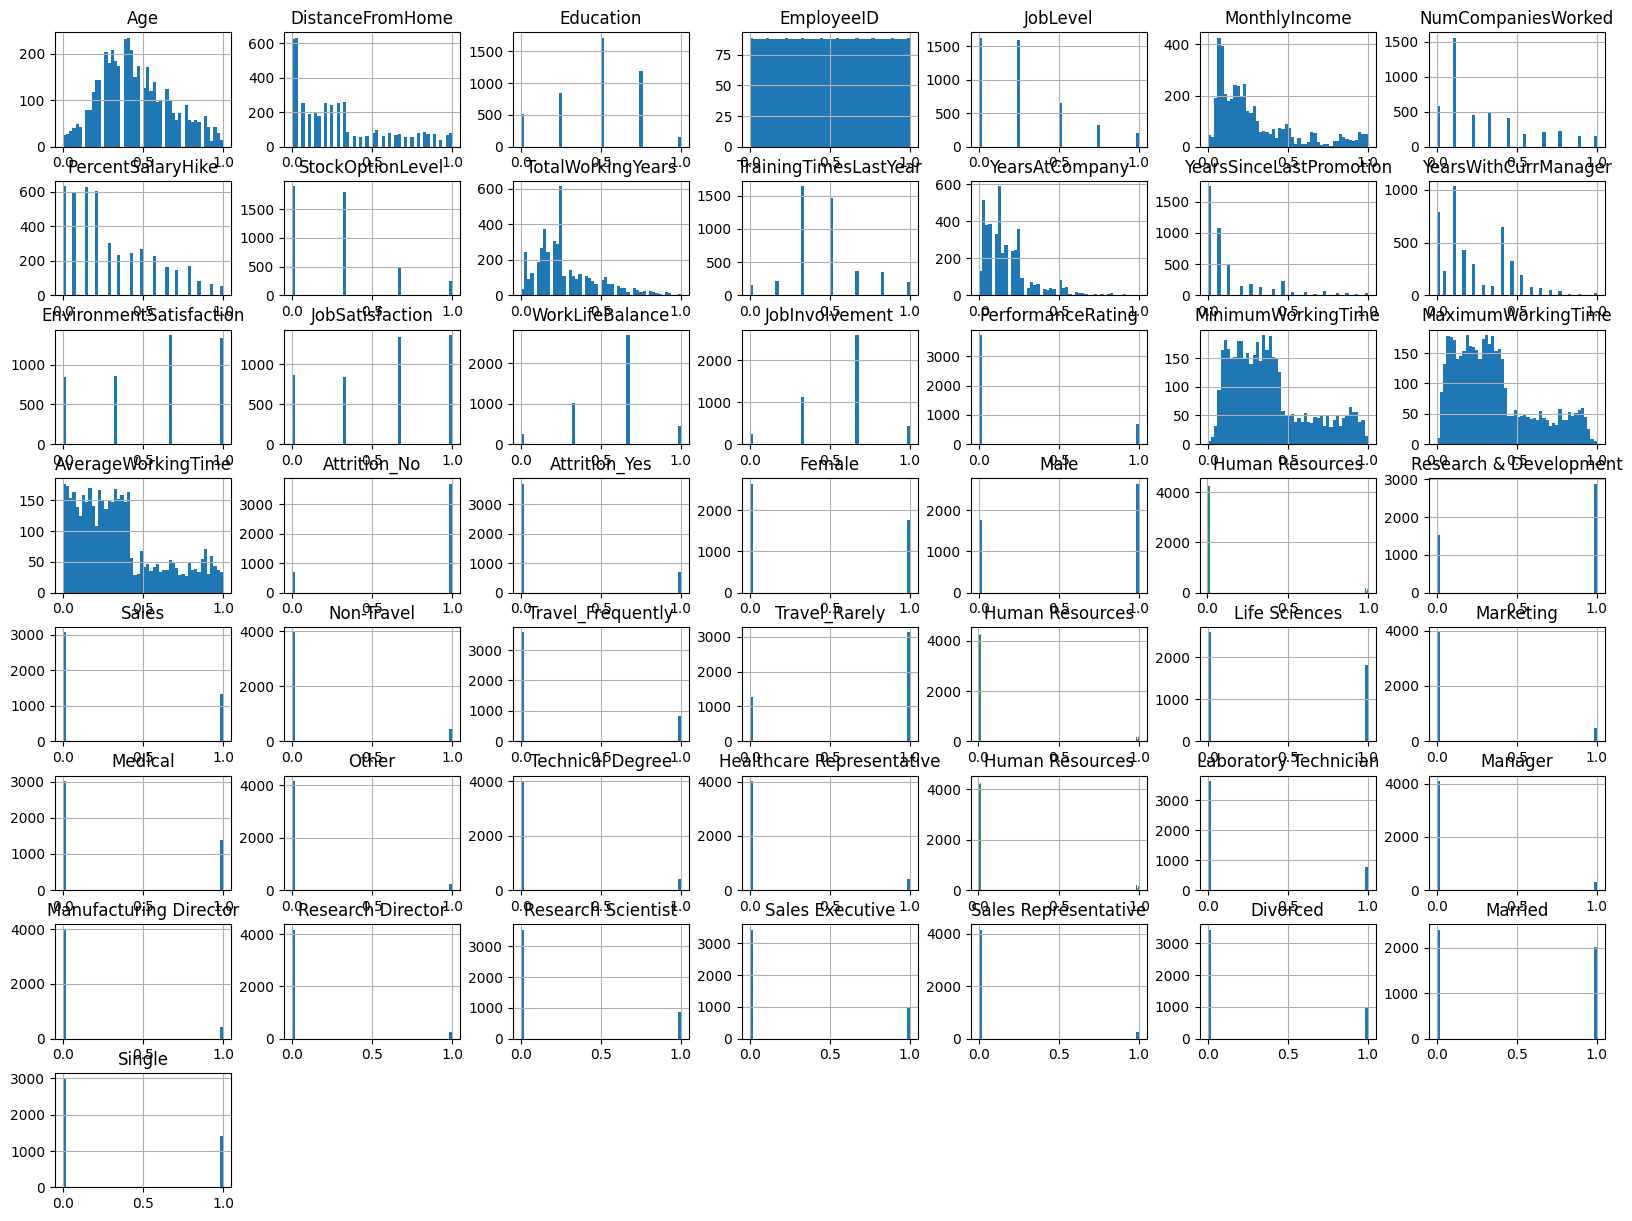

In [122]:
# Display the first 5 rows of the data
print(full_employee_data.head())

# Display the shape of the data
print(full_employee_data.shape)

# Display the columns of the data
print(full_employee_data.columns)

# Display the summary statistics of the data
print(full_employee_data.describe(include='all'))

# Display the missing values in the data
print(full_employee_data.isnull().sum())

# Display the unique values in the data
full_employee_data.hist(bins=50, figsize=(20, 15))
plt.show()